In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
data=pd.read_csv("Data/heart.csv")

In [5]:
data.shape

(1025, 14)

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


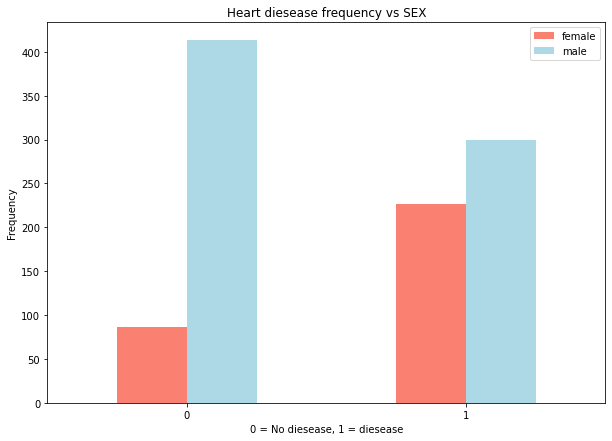

In [9]:
pd.crosstab(data.target,data.sex).plot(kind="bar",figsize=(10,7),color=["salmon","lightblue"])

plt.title("Heart diesease frequency vs SEX")
plt.xlabel("0 = No diesease, 1 = diesease")
plt.ylabel("Frequency")
plt.legend(["female","male"])
plt.xticks(rotation=0);

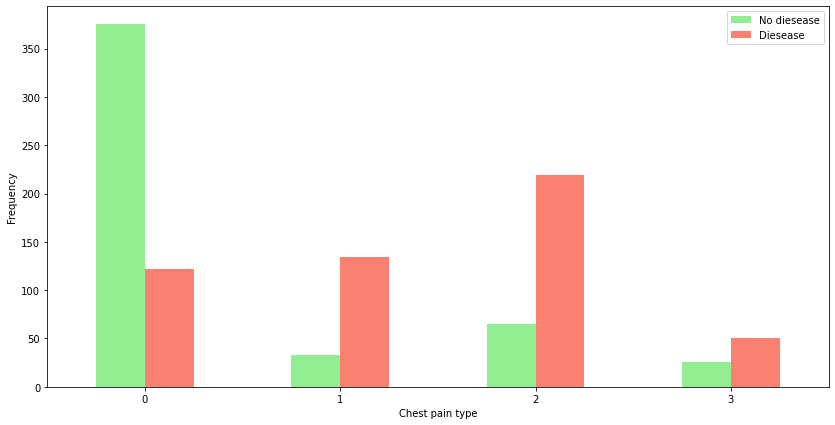

In [10]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(14,7),color=["lightgreen","salmon"])
plt.xlabel("Chest pain type")
plt.ylabel("Frequency")
plt.legend(["No diesease","Diesease"])
plt.xticks(rotation=0);

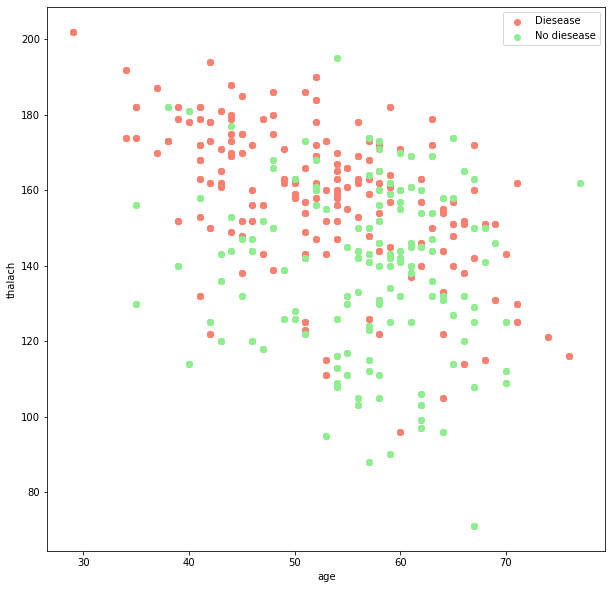

In [11]:
plt.figure(figsize=(10,10))

plt.scatter(data.age[data.target==1],data.thalach[data.target==1],c="salmon")

plt.scatter(data.age[data.target==0],data.thalach[data.target==0],c="lightgreen")

plt.xlabel("age")
plt.ylabel("thalach")
plt.legend(["Diesease","No diesease"]);


## Modeling

In [5]:
x=data.drop("target",axis=1)
y=data["target"]

In [13]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
def Train(model):
    m=model()
    m.fit(x_train,y_train)
    test_acc=m.score(x_test,y_test)*100
    train_acc=m.score(x_train,y_train)*100
    print("test acuuracy = ",test_acc)
    print("train accuracy = ",train_acc)
    

In [17]:
Train(LogisticRegression)

test acuuracy =  78.04878048780488
train accuracy =  86.21951219512195


C:\Users\user\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
Train(KNeighborsClassifier)

test acuuracy =  73.17073170731707
train accuracy =  92.31707317073172


In [19]:
Train(RandomForestClassifier)

test acuuracy =  98.53658536585365
train accuracy =  100.0


In [20]:
Train(SVC)

test acuuracy =  68.29268292682927
train accuracy =  72.3170731707317


In [21]:
grid=GridSearchCV(RandomForestClassifier(),{"n_estimators":[130,140,150,160,170],"max_depth":[180,190,200,210,220]},cv=5)

In [22]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [180, 190, 200, 210, 220],
                         'n_estimators': [130, 140, 150, 160, 170]})

In [23]:
results=pd.DataFrame(grid.cv_results_)


In [24]:
results[["param_max_depth","param_n_estimators","mean_test_score"]]

,param_max_depth,param_n_estimators,mean_test_score
0,180,130,0.982927
1,180,140,0.979268
2,180,150,0.979268
3,180,160,0.979268
4,180,170,0.981707
5,190,130,0.980488
6,190,140,0.980488
7,190,150,0.979268
8,190,160,0.981707
9,190,170,0.979268


In [25]:
grid.best_score_

0.9829268292682928

In [26]:
grid.best_estimator_

RandomForestClassifier(max_depth=210, n_estimators=130)

In [27]:
from sklearn.metrics import confusion_matrix,classification_report

In [28]:
rand=RandomForestClassifier(max_depth=180, n_estimators=160)

In [29]:
rand.fit(x_train,y_train)

RandomForestClassifier(max_depth=180, n_estimators=160)

In [30]:
y_predict=rand.predict(x_test)

In [37]:
con=confusion_matrix(y_test,y_predict)
table=pd.DataFrame(con)
table

,0,1
0,102,0
1,3,100


In [32]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



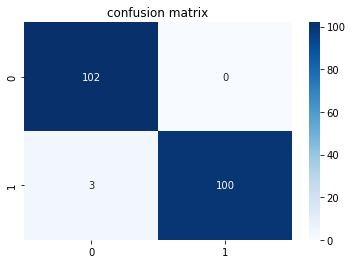

In [81]:
##plt.figure(figsize=(8,6))
plt.title("confusion matrix");
sn.heatmap(con,fmt="d",annot=True,cmap="Blues")
plt.show()

In [7]:
model=RandomForestClassifier(max_depth=210, n_estimators=130)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=210, n_estimators=130)

In [8]:
model.score(x_test,y_test)

0.9853658536585366

In [9]:
import pickle

In [16]:
with open("model_heart","wb") as f:
    pickle.dump(model,f)

In [17]:
with open("model_heart","rb") as f:
    md=pickle.load(f)

In [19]:
md.score(x_test,y_test)

0.9853658536585366